torch.Size([3000, 1])


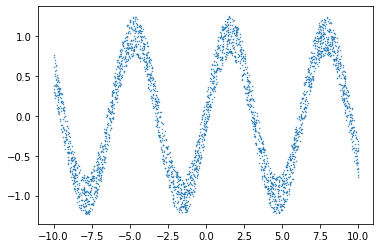

loss: tensor(5559.1826, grad_fn=<SumBackward0>)
loss: tensor(17.0639, grad_fn=<SumBackward0>)
loss: tensor(17.1897, grad_fn=<SumBackward0>)
loss: tensor(12.1591, grad_fn=<SumBackward0>)
loss: tensor(10.1097, grad_fn=<SumBackward0>)
loss: tensor(16.3533, grad_fn=<SumBackward0>)
loss: tensor(11.0340, grad_fn=<SumBackward0>)
loss: tensor(10.1957, grad_fn=<SumBackward0>)
loss: tensor(7.9760, grad_fn=<SumBackward0>)
loss: tensor(7.4247, grad_fn=<SumBackward0>)
loss: tensor(8.1358, grad_fn=<SumBackward0>)
loss: tensor(7.9884, grad_fn=<SumBackward0>)
loss: tensor(8.1750, grad_fn=<SumBackward0>)
loss: tensor(8.3901, grad_fn=<SumBackward0>)
loss: tensor(6.6971, grad_fn=<SumBackward0>)
loss: tensor(7.3248, grad_fn=<SumBackward0>)
loss: tensor(6.2436, grad_fn=<SumBackward0>)
loss: tensor(7.4893, grad_fn=<SumBackward0>)
loss: tensor(6.4789, grad_fn=<SumBackward0>)
loss: tensor(6.7433, grad_fn=<SumBackward0>)


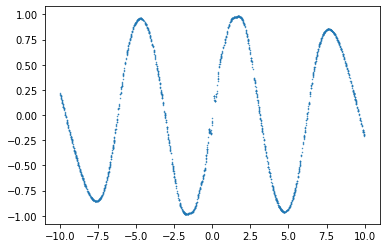

In [13]:
import torch
import matplotlib.pyplot as plt
import random
import torch.nn as nn

n_example = 3000
x_example = torch.rand(n_example, 1) * 20 - 10
y_example = torch.sin(x_example) + torch.rand(n_example, 1) / 2 - 0.25
print(x_example.shape)

plt.scatter(x_example.numpy(), y_example.numpy(), marker='o', s=0.2)
plt.show()

h1 = torch.randn(1, 64, requires_grad = True)
h2 = torch.randn(64, 64, requires_grad = True)
h3 = torch.randn(64, 1, requires_grad = True)

for it in range(10000):
    batch_size = 200
    x_train_batch = torch.rand(batch_size, 1) * 20 - 10
    y_train_batch = torch.sin(x_train_batch) + torch.rand(batch_size, 1) / 2 - 0.25
    y_predict_batch = x_train_batch.mm(h1).tanh().mm(h2).tanh().mm(h3)
    loss = torch.pow(y_predict_batch -  y_train_batch, 2).sum()
    loss.backward()
    if it % 500 == 0:
        print('loss:', loss)
    learning_rate = 0.00001
    with torch.no_grad():
        h1 -= h1.grad * learning_rate
        h2 -= h2.grad * learning_rate
        h3 -= h3.grad * learning_rate
        
        h1.grad.zero_()
        h2.grad.zero_()
        h3.grad.zero_()

n_test = 2000
with torch.no_grad():
    x_test = torch.rand(n_test, 1) * 20 - 10
    y_test_predict = x_test.mm(h1).tanh().mm(h2).tanh().mm(h3)
    plt.clf()
    plt.scatter(x_test.numpy(), y_test_predict.numpy(), marker='o', s=0.2)
    plt.show()